In [19]:
print("all ok")

all ok


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [23]:
df=pd.read_csv("students.csv")

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
x=df.drop(columns=["math_score"], axis=1)

y=df["math_score"]

In [25]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

In [11]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [27]:
numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [28]:
x=preprocessor.fit_transform(x)

In [29]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=12)

In [31]:
def eval_model_performance(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    R2_score = r2_score(true, predicted)
    
    return mae, rmse, R2_score

In [37]:
models = {
    "Linear_Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNRegressor":KNeighborsRegressor(),
    "Decision_Tree":DecisionTreeRegressor(),
    "Random_forest_regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}

In [38]:
model_list = []
train_mae_list = []
train_rmse_list = []
train_r2_list = []
test_mae_list = []
test_rmse_list = []
test_r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    # predictions
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    
    train_mae, train_rmse, train_r2 = eval_model_performance(y_train, train_predictions)
    test_mae, test_rmse, test_r2 = eval_model_performance(y_test, test_predictions)
    
    # Store results
    model_list.append(list(models.keys())[i])
    train_mae_list.append(train_mae)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)
    test_mae_list.append(test_mae)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)

# Create a DataFrame with all results
results_df = pd.DataFrame({
    'Model': model_list,
    'Train_MAE': train_mae_list,
    'Train_RMSE': train_rmse_list,
    'Train_R2': train_r2_list,
    'Test_MAE': test_mae_list,
    'Test_RMSE': test_rmse_list,
    'Test_R2': test_r2_list
})

# Display the results
print("\n" + "="*100)
print("MODEL PERFORMANCE COMPARISON")
print("="*100 + "\n")
print(results_df.to_string(index=False))

# Display sorted by Test R2 Score (best model first)
print("\n" + "="*100)
print("MODELS RANKED BY TEST R2 SCORE (BEST FIRST)")
print("="*100 + "\n")
print(results_df.sort_values('Test_R2', ascending=False).to_string(index=False))



MODEL PERFORMANCE COMPARISON

                  Model  Train_MAE  Train_RMSE  Train_R2  Test_MAE  Test_RMSE  Test_R2
      Linear_Regression   4.382574    5.463816  0.873607  3.726684   4.757417 0.888871
                  Lasso   5.278818    6.642064  0.813217  4.767224   6.173685 0.812857
                  Ridge   4.381876    5.464043  0.873596  3.723272   4.756477 0.888915
            KNRegressor   4.769500    5.979063  0.848645  4.792000   6.145958 0.814534
          Decision_Tree   0.036250    0.447912  0.999151  6.765000   8.457837 0.648760
Random_forest_regressor   1.858161    2.356082  0.976498  4.516945   5.686208 0.841244
           XGBRegressor   0.689954    1.089736  0.994972  4.942398   6.272072 0.806845
          CatBRegressor   2.410691    3.061823  0.960309  4.367968   5.511437 0.850853
      AdaBoostRegressor   4.894612    5.971443  0.849030  4.396820   5.692895 0.840870

MODELS RANKED BY TEST R2 SCORE (BEST FIRST)

                  Model  Train_MAE  Train_RMSE  Train

# Insights
## LinearRegression performs well, so we select this model for our project

In [39]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)
r2_score = r2_score(y_test, y_pred)*100

print("Accuracy of model is: %.2f" %r2_score)

Accuracy of model is: 88.89


Text(0, 0.5, 'predictions')

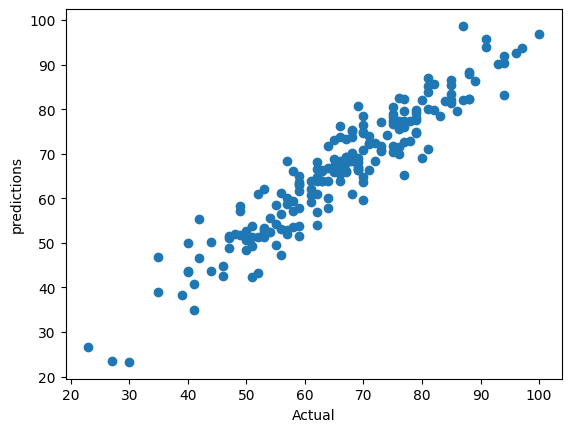

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predictions")

<Axes: xlabel='math_score'>

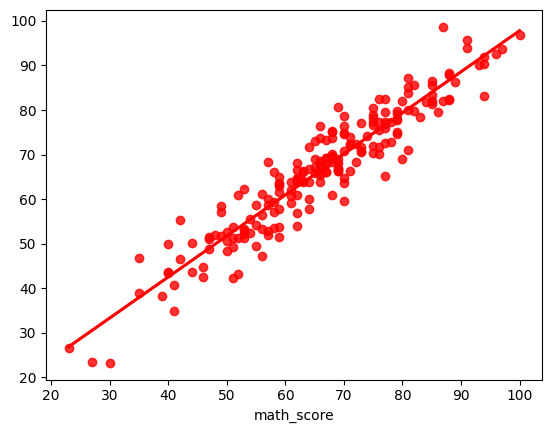

In [41]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

In [42]:
predictions_diff = pd.DataFrame({"Actual Values":y_test, "Predicted Values":y_pred, "Difference":y_test - y_pred})
predictions_diff

,Actual Values,Predicted Values,Difference
518,66,67.268057,-1.268057
871,70,64.691260,5.308740
797,70,76.359154,-6.359154
274,88,82.275325,5.724675
325,82,85.610024,-3.610024
...,...,...,...
909,70,74.931894,-4.931894
757,70,74.561038,-4.561038
965,62,64.249719,-2.249719
4,76,82.518131,-6.518131
